# **MONTE CARLO SIMULATION**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from pandas_datareader import data
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline
from pandas_datareader import data as pdr
!pip install yfinance
import yfinance as yfin
yfin.pdr_override()
import warnings
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Get data from Yahoo Finance
ticker = 'JNJ'
df_yf = pdr.get_data_yahoo(ticker, start='2021-03-31')
df_yf

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-31,164.960007,165.389999,163.699997,164.350006,156.057465,8281500
2021-04-01,162.600006,163.839996,162.259995,162.830002,154.614136,7229700
2021-04-05,163.639999,164.750000,162.660004,163.429993,155.183853,7387100
2021-04-06,164.080002,164.520004,163.000000,163.389999,155.145889,5074200
2021-04-07,163.550003,164.279999,163.320007,163.610001,155.354782,4608000
...,...,...,...,...,...,...
2023-04-05,164.369995,165.660004,162.759995,165.610001,165.610001,16704200
2023-04-06,165.990005,167.229996,164.800003,165.149994,165.149994,9615400
2023-04-10,164.630005,164.839996,163.639999,164.320007,164.320007,5354000


In [ ]:
df = df_yf[['Adj Close']]
df

,Adj Close
Date,
2021-03-31,156.057465
2021-04-01,154.614136
2021-04-05,155.183853
2021-04-06,155.145889
2021-04-07,155.354782
...,...
2023-04-05,165.610001
2023-04-06,165.149994
2023-04-10,164.320007


<Axes: xlabel='Date'>

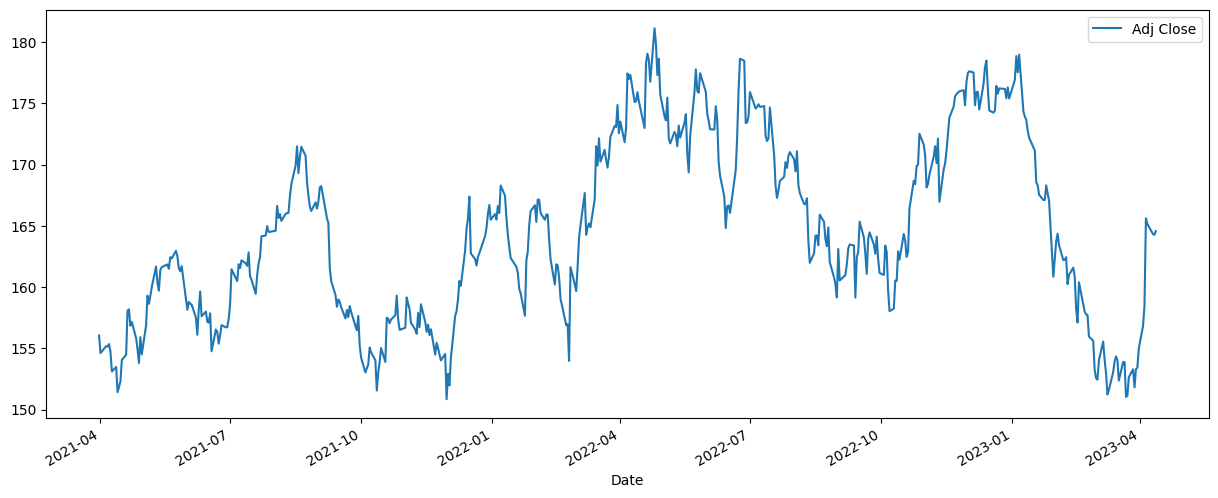

In [ ]:
df.plot(figsize=(15,6))

In [ ]:
stock_returns = np.log(1 + df.pct_change())
#stock_returns.tail()

Text(0, 0.5, 'Frequency')

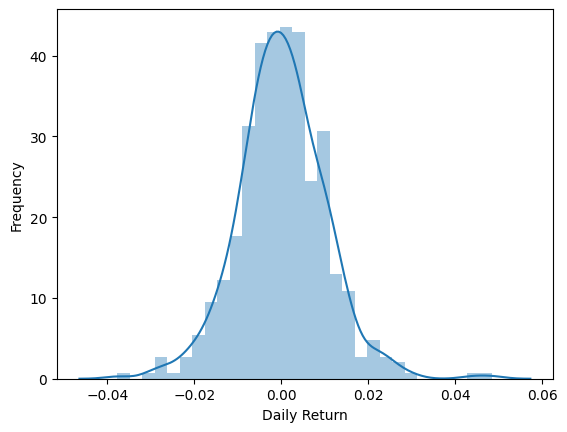

In [ ]:
sns.distplot(stock_returns.iloc[1:])
plt.xlabel("Daily Return")
plt.ylabel("Frequency")

<Axes: xlabel='Date'>

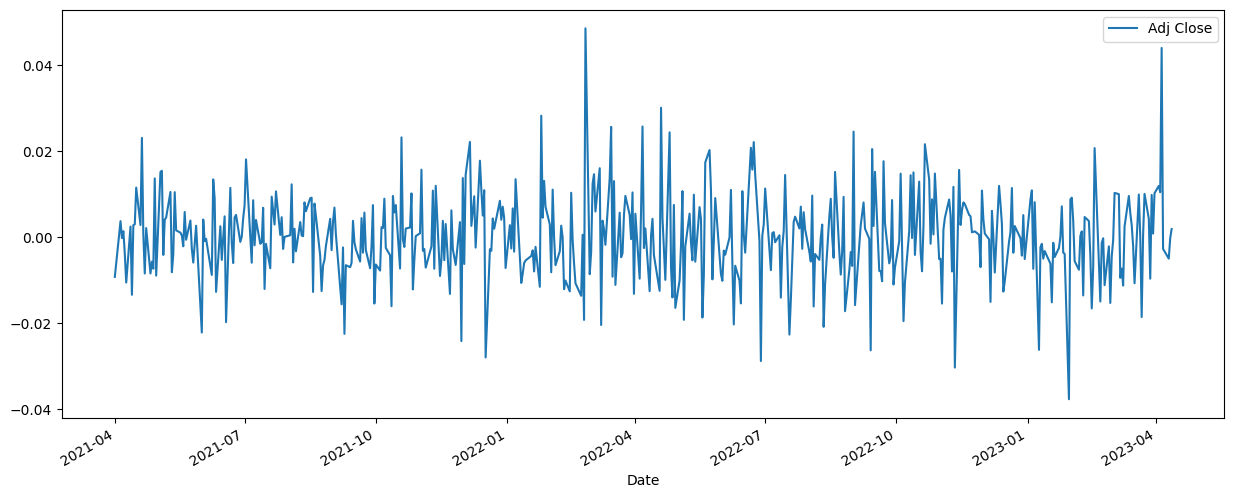

In [ ]:
stock_returns.plot(figsize=(15,6))

In [ ]:
u = stock_returns.mean()
var = stock_returns.var()

Calculate the drift, using the following formula:

d
r
i
f
t
=
u
−
1
/
2
⋅
v
a
r


In [ ]:
drift = u - (0.5*var)
drift

Adj Close    0.000053
dtype: float64

In [ ]:
stddev = stock_returns.std() 
stddev

Adj Close    0.010104
dtype: float64

In [ ]:
type(drift)

pandas.core.series.Series

In [ ]:
type(stddev)

pandas.core.series.Series

In [ ]:
np.array(drift)

array([5.29244817e-05])

In [ ]:
drift.values

array([5.29244817e-05])

In [ ]:
stddev.values

array([0.01010425])

d
a
i
l
y
_
r
e
t
u
r
n
s
=
e
x
p
(
d
r
i
f
t
+
s
t
d
e
v
∗
z
)
,
w
h
e
r
e
 
z
=
n
o
r
m
.
p
p
f
(
n
p
.
r
a
n
d
o
m
.
r
a
n
d
(
t
_
i
n
t
e
r
v
a
l
s
,
i
t
e
r
a
t
i
o
n
s
)
Z
−
C
o
r
r
e
s
p
o
n
d
s
t
o
t
h
e
d
i
s
t
a
n
c
e
b
e
t
w
e
e
n
t
h
e
m
e
a
n
a
n
d
e
v
e
n
t
,
e
x
p
r
e
s
s
e
d
a
s
t
h
e
n
u
m
b
e
r
o
f
S
t
a
n
d
a
r
d
d
e
v
i
a
t
i
o
n
s 

In [ ]:
x = np.random.rand(10,2)
#x

In [ ]:
norm.ppf(x)

array([[ 0.21161104, -2.15258644],
       [-0.36924703,  0.34074025],
       [ 0.2080404 , -1.20131859],
       [-0.20283105, -1.79880944],
       [ 0.27791582,  0.09237132],
       [ 1.24976005, -1.51947761],
       [ 0.48802637,  0.48602606],
       [ 0.79855234,  0.16005367],
       [-0.28351205, -0.82285641],
       [-0.42630909,  0.62916542]])

In [ ]:
stdev = stock_returns.std()
days = 15
iterations = 50
#Create random value with a given shape in the range from 0 to 1 - np.random.rand(10,2)
Z = norm.ppf(np.random.rand(days, iterations)) #days, trials

*d
a
i
l
y
_
r
e
t
u
r
n
s
=
e
r
r
=
d
r
i
f
t
+
s
t
d
e
v
⋅
z*

In [ ]:
get_daily_returns = np.exp(drift.values + stdev.values * Z)

*S
t
=
S
0
⋅
d
a
i
l
y
_
r
e
t
u
r
n
t*
 
get_daily_returns=daily_return

S_0=? - It will be the current stock price

In [ ]:
S0 = df.iloc[-1]
S0

Adj Close    164.572998
Name: 2023-04-12 00:00:00, dtype: float64

In [ ]:
price_paths = np.zeros_like(get_daily_returns)

In [ ]:
price_paths.shape

(15, 50)

In [ ]:
price_paths[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
price_paths[0] = S0

In [ ]:
for t in range(1, days):
    price_paths[t] = price_paths[t-1]*get_daily_returns[t]

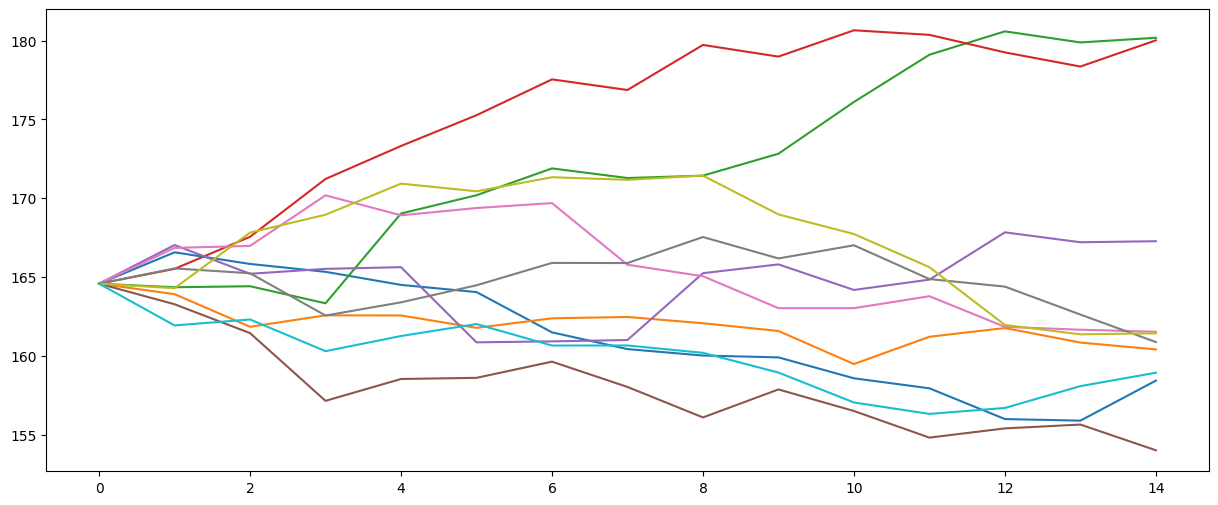

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(pd.DataFrame(price_paths).iloc[:,0:10])

Text(0, 0.5, 'Frequency')

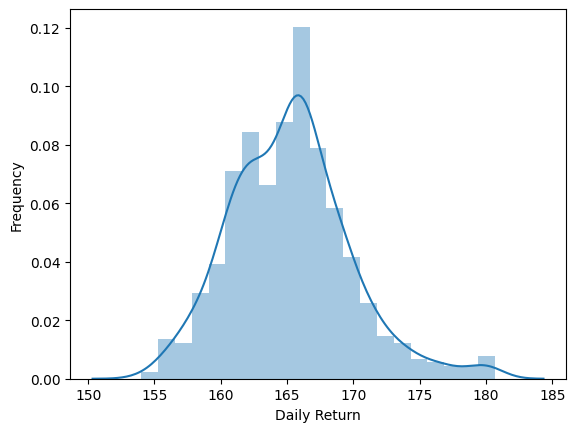

In [ ]:
sns.distplot(pd.DataFrame(price_paths).iloc[1:])
plt.xlabel("Daily Return")
plt.ylabel("Frequency")

In [ ]:
df1=pd.DataFrame(price_paths)
df1.tail()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
10,158.568936,159.473555,176.106910,180.657826,164.175760,156.492964,163.020670,167.011154,167.726668,157.034152,...,159.305027,158.691278,170.984738,160.700514,171.562986,162.451268,169.119812,168.394333,173.726144,171.641837
11,157.932855,161.205063,179.105980,180.368058,164.831189,154.803510,163.777613,164.867122,165.622236,156.308797,...,158.608899,159.787039,169.262264,159.789375,174.037888,162.968721,170.489627,168.777163,172.295886,173.679893
12,155.981076,161.758780,180.588876,179.254163,167.831571,155.388946,161.833182,164.388215,161.952462,156.685071,...,159.194991,158.542237,169.108581,160.371840,173.753676,165.795131,170.478070,167.081775,172.620763,172.747921
13,155.879670,160.836104,179.886897,178.356539,167.204133,155.631955,161.652186,162.614043,161.358836,158.071724,...,158.017501,156.820794,171.517118,161.136637,173.469140,166.619271,172.061269,166.402793,174.707553,173.840808
14,158.420691,160.402075,180.181150,180.019277,167.268762,153.999659,161.521923,160.870042,161.425632,158.923064,...,158.973558,156.346497,171.241413,162.128928,170.933029,164.974511,171.884672,165.429017,176.207264,173.470896


In [ ]:
u1 = df1.mean()

In [ ]:
var1 =df1.var()

In [ ]:
u

Adj Close    0.000104
dtype: float64

In [ ]:
stock_returns1 = np.log(1 + df1.pct_change())
stock_returns1.tail()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
10,-0.008333,-0.013070,0.018818,0.009296,-0.009835,-0.008706,0.000005,0.005013,-0.007388,-0.012013,...,-0.019544,0.008715,0.016988,0.018023,0.006182,-0.009907,0.001853,-0.002936,0.013979,0.008998
11,-0.004019,0.010799,0.016886,-0.001605,0.003984,-0.010854,0.004632,-0.012921,-0.012626,-0.004630,...,-0.004379,0.006881,-0.010125,-0.005686,0.014323,0.003180,0.008067,0.002271,-0.008267,0.011804
12,-0.012435,0.003429,0.008245,-0.006195,0.018039,0.003775,-0.011943,-0.002909,-0.022407,0.002404,...,0.003688,-0.007821,-0.000908,0.003639,-0.001634,0.017195,-0.000068,-0.010096,0.001884,-0.005380
13,-0.000650,-0.005720,-0.003895,-0.005020,-0.003746,0.001563,-0.001119,-0.010851,-0.003672,0.008811,...,-0.007424,-0.010917,0.014142,0.004758,-0.001639,0.004959,0.009244,-0.004072,0.012016,0.006307
14,0.016170,-0.002702,0.001634,0.009279,0.000386,-0.010544,-0.000806,-0.010783,0.000414,0.005371,...,0.006032,-0.003029,-0.001609,0.006139,-0.014728,-0.009920,-0.001027,-0.005869,0.008547,-0.002130


In [ ]:
u1 = stock_returns1 .mean()

In [ ]:
u1

0    -0.002721
1    -0.001834
2     0.006472
3     0.006408
4     0.001161
5    -0.004743
6    -0.001337
7    -0.001626
8    -0.001379
9    -0.002495
10    0.004189
11   -0.000621
12    0.000431
13    0.000417
14   -0.001467
15    0.000151
16    0.002023
17    0.001785
18   -0.002869
19    0.001666
20   -0.001858
21    0.003326
22    0.003593
23    0.002127
24    0.000430
25   -0.001703
26    0.000917
27   -0.000603
28   -0.001663
29    0.000501
30   -0.003055
31   -0.000808
32   -0.002166
33    0.001518
34   -0.002382
35    0.000598
36    0.002179
37   -0.003596
38    0.004189
39   -0.000803
40   -0.002473
41   -0.003663
42    0.002837
43   -0.001069
44    0.002708
45    0.000174
46    0.003105
47    0.000371
48    0.004879
49    0.003761
dtype: float64

# **Simple Moving Average**

In [ ]:
pip install tabulate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
%matplotlib notebook
import seaborn as sns
from pandas_datareader import data
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()
import datetime as dt
import warnings
warnings.filterwarnings("ignore")
from tabulate import tabulate

In [ ]:
df.tail()

,Adj Close
Date,
2023-04-05,165.610001
2023-04-06,165.149994
2023-04-10,164.320007
2023-04-11,164.270004
2023-04-12,164.572998


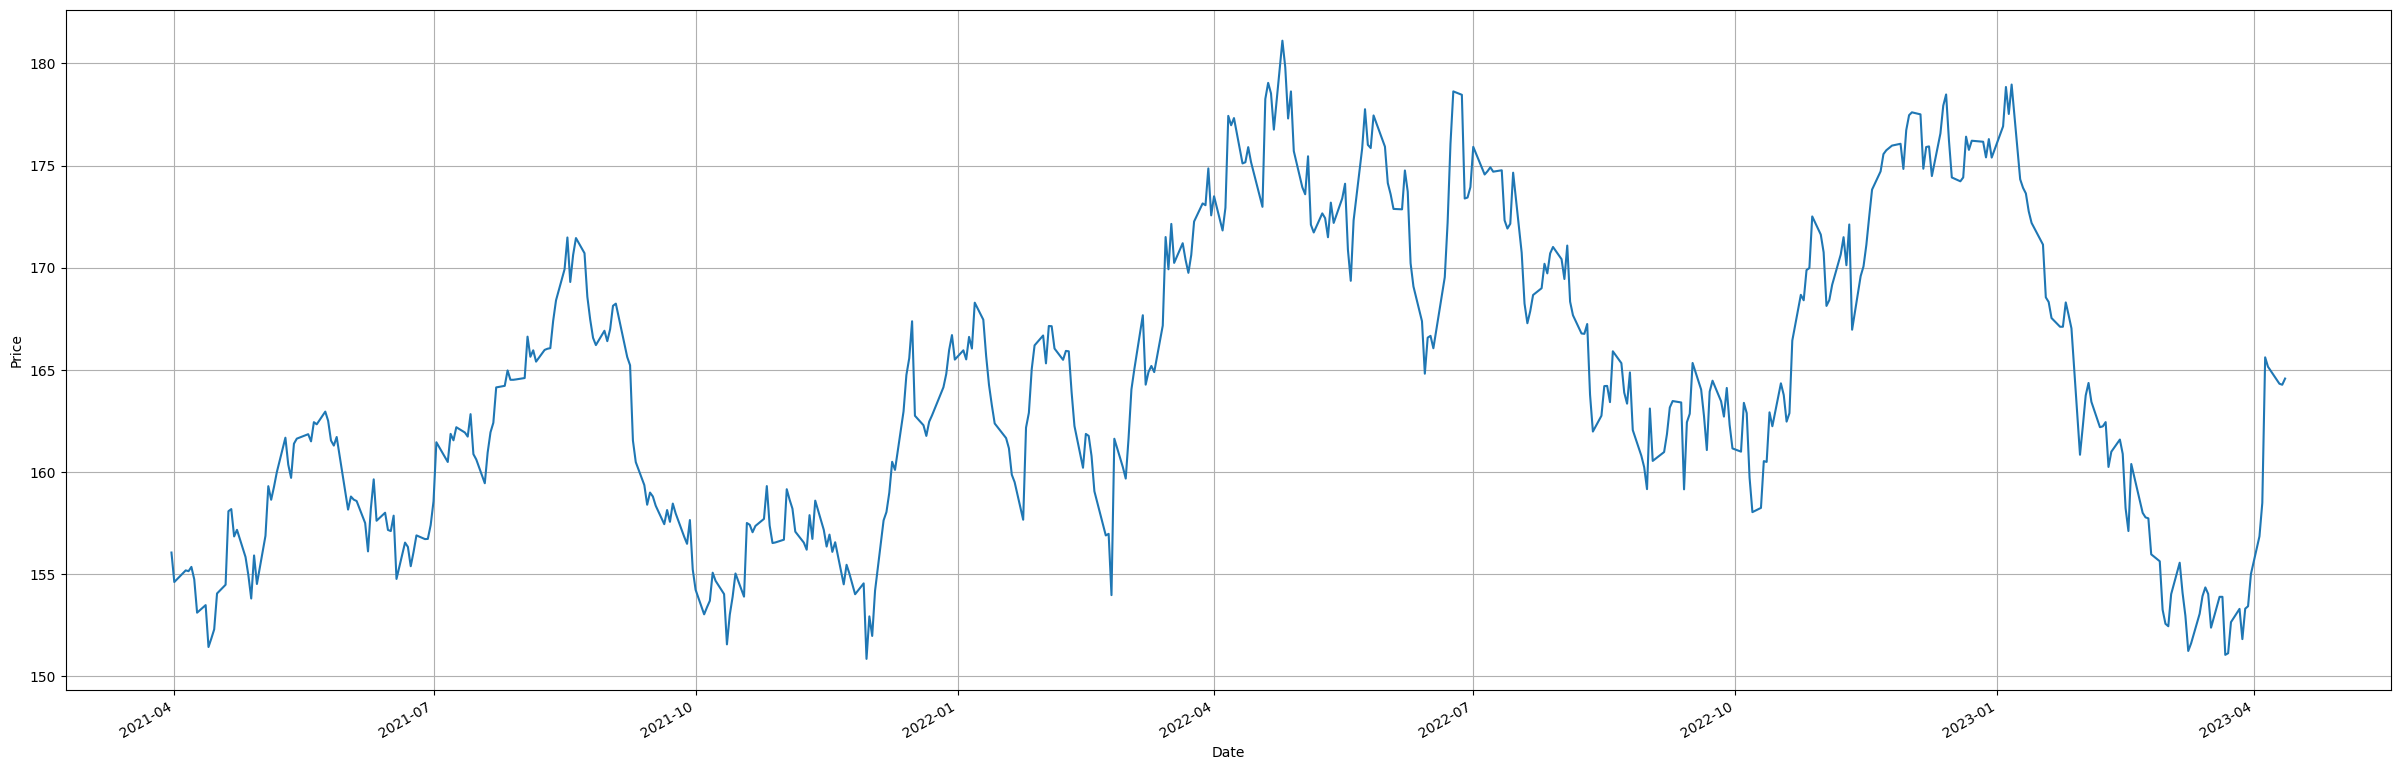

In [ ]:
df['Adj Close'].plot(figsize = (30, 10))
plt.grid()
plt.ylabel("Price")
plt.show()

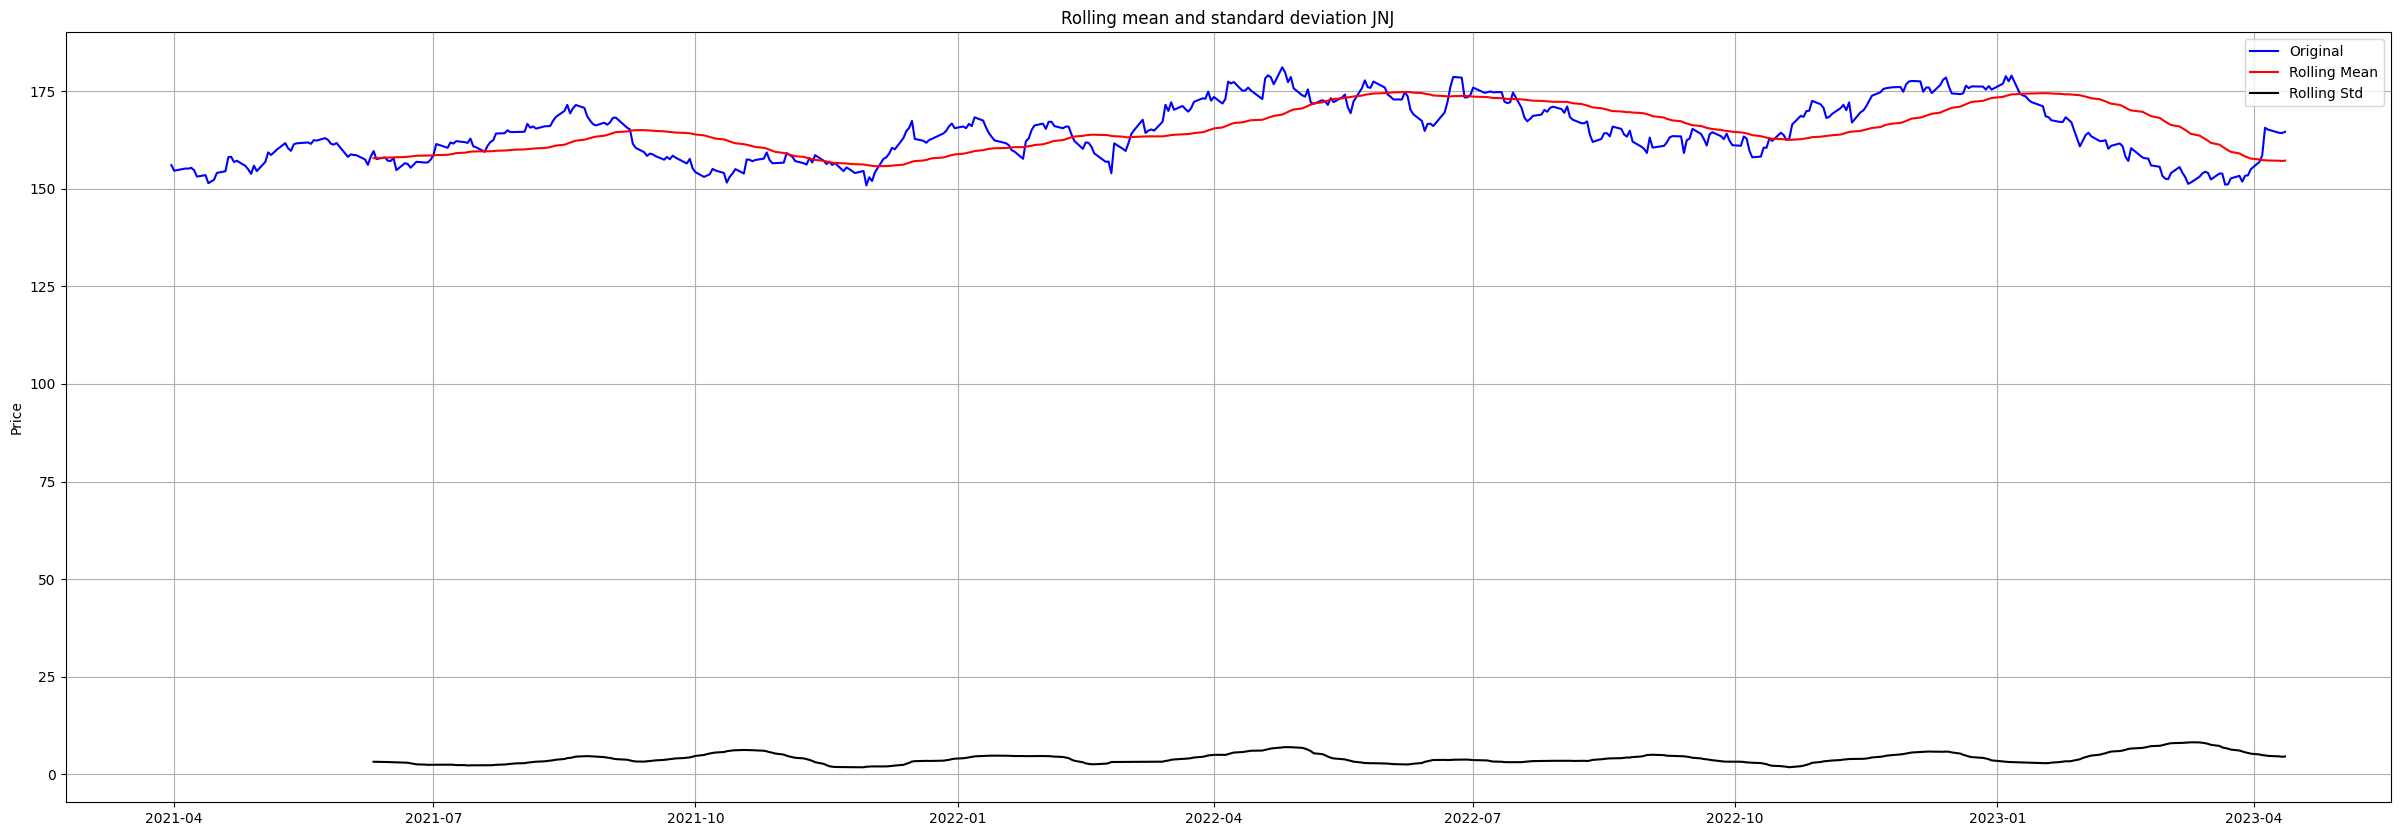

In [ ]:
rolling_mean = df['Adj Close'].rolling(50).mean()
rolling_std = df['Adj Close'].rolling(50).std()

plt.figure(figsize = (30, 10))
fig=plt.figure(1)

orig = plt.plot(df['Adj Close'],color='blue',label='Original')
mean = plt.plot(rolling_mean,color='red',label='Rolling Mean')
std = plt.plot(rolling_std,color='black',label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling mean and standard deviation ' + 'JNJ')
plt.grid()
plt.ylabel("Price")
plt.show()

In [ ]:
# create 50 days simple moving average column
df['SMA50'] = df['Adj Close'].rolling(window = 50, min_periods = 1).mean()
# create 100 days simple moving average column
df['SMA100'] = df['Adj Close'].rolling(window = 100, min_periods = 1).mean()
# display first few rows
df

,Adj Close,SMA50,SMA100
Date,,,
2021-03-31,156.057465,156.057465,156.057465
2021-04-01,154.614136,155.335800,155.335800
2021-04-05,155.183853,155.285151,155.285151
2021-04-06,155.145889,155.250336,155.250336
2021-04-07,155.354782,155.271225,155.271225
...,...,...,...
2023-04-05,165.610001,157.299665,165.771952
2023-04-06,165.149994,157.236675,165.702320
2023-04-10,164.320007,157.169396,165.675883


# **Trade signals**

When the short term moving average crosses above the long term moving average, this indicates a buy signal.
Contrary, when the short term moving average crosses below the long term moving average, it may be a good moment to sell.

In [ ]:
df['Signal'] = 0.0
df['Signal'] = np.where(df['SMA50'] > df['SMA100'], 1.0, 0.0)

In [ ]:
df['Position'] = df['Signal'].diff()
# display first few rows
df.head()

,Adj Close,SMA50,SMA100,Signal,Position
Date,,,,,
2021-03-31,156.057465,156.057465,156.057465,0.0,NaN
2021-04-01,154.614136,155.335800,155.335800,0.0,0.0
2021-04-05,155.183853,155.285151,155.285151,0.0,0.0
2021-04-06,155.145889,155.250336,155.250336,0.0,0.0
2021-04-07,155.354782,155.271225,155.271225,0.0,0.0


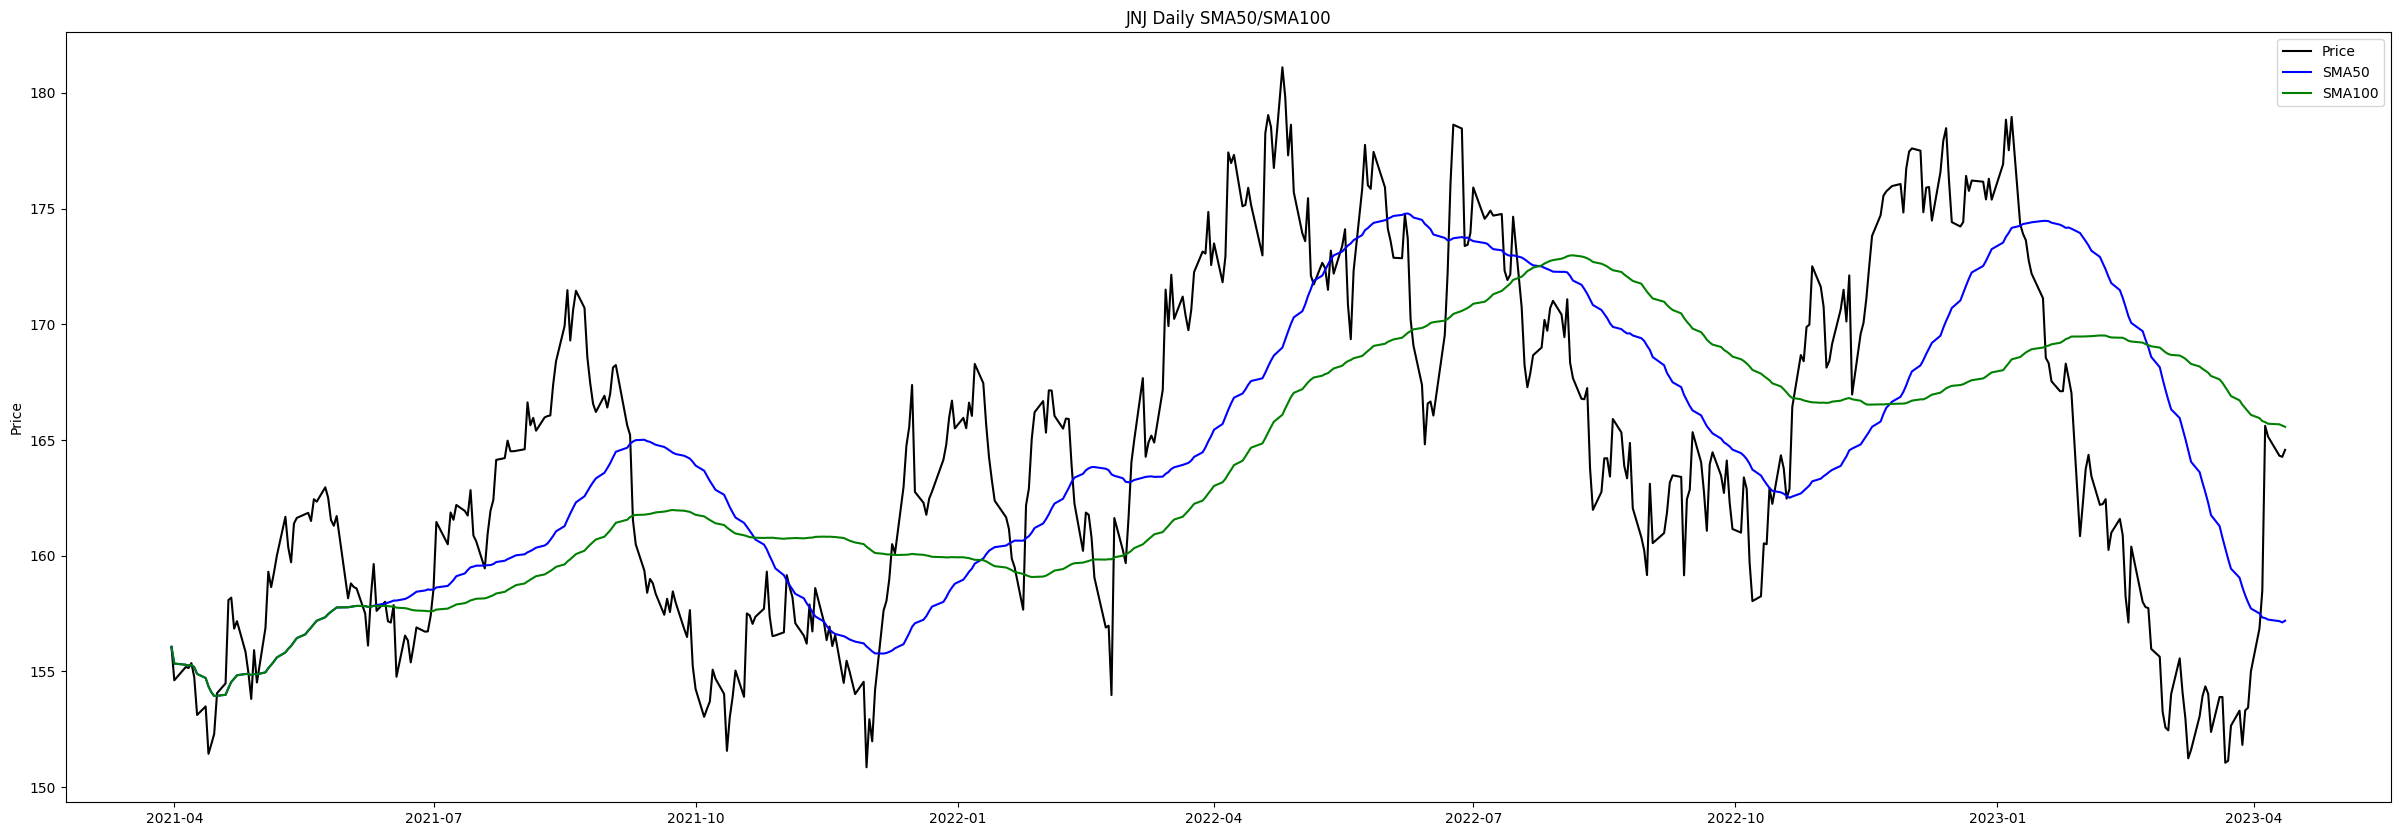

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(df["Adj Close"], color="black", label="Price")
plt.plot(df["SMA50"], color="blue", label="SMA50")
plt.plot(df["SMA100"], color="green", label="SMA100")
plt.ylabel("Price")
plt.title("JNJ Daily SMA50/SMA100")
plt.legend()
plt.show()

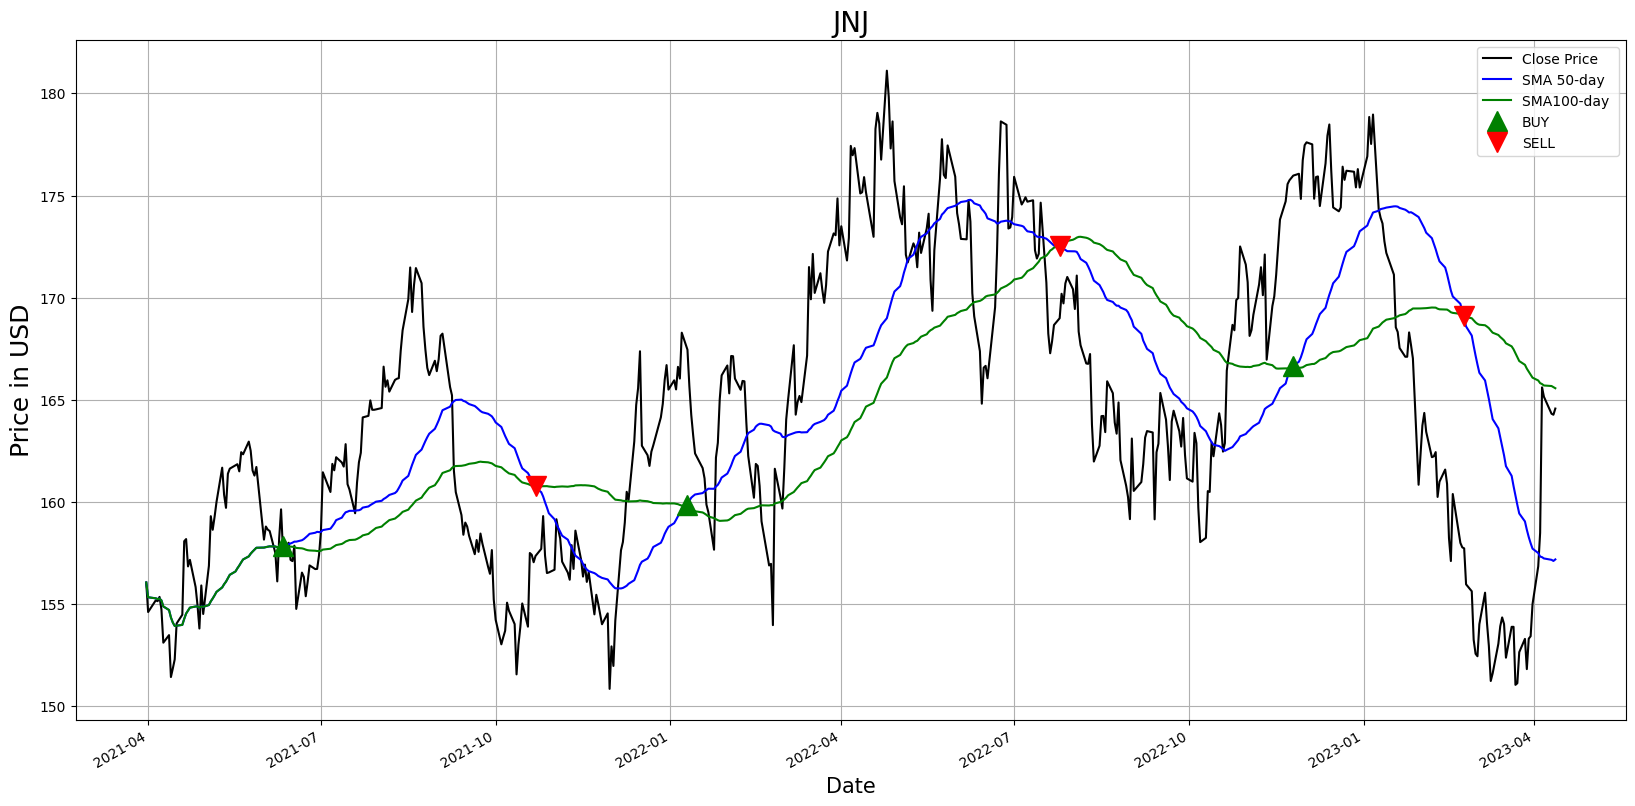

In [ ]:
plt.figure(figsize = (20,10))
# plot close price, short-term and long-term moving averages 
df['Adj Close'].plot(color = 'k', label= 'Close Price') 
df['SMA50'].plot(color = 'b',label = 'SMA 50-day ') 
df['SMA100'].plot(color = 'g', label = 'SMA100-day ')
# plot ‘buy’ signals
plt.plot(df[df['Position'] == 1].index, 
         df['SMA50'][df['Position'] == 1], 
         '^', markersize = 15, color = 'g', label = 'BUY')
# plot ‘sell’ signals
plt.plot(df[df['Position'] == -1].index, 
         df['SMA100'][df['Position'] == -1], 
         'v', markersize = 15, color = 'r', label = 'SELL')
plt.ylabel('Price in USD', fontsize = 18 )
plt.xlabel('Date', fontsize = 15 )
plt.title(ticker, fontsize = 20)
plt.legend()
plt.grid()
plt.show()



In [ ]:
df_position = df[(df['Position'] == 1) | (df['Position'] == -1)]
df_position['Position'] = df_position['Position'].apply(lambda x: 'Buy' if x == 1 else 'Sell')
print(tabulate(df_position, headers = 'keys', tablefmt = 'psql'))

+---------------------+-------------+---------+----------+----------+------------+
| Date                |   Adj Close |   SMA50 |   SMA100 |   Signal | Position   |
|---------------------+-------------+---------+----------+----------+------------|
| 2021-06-11 00:00:00 |     157.614 | 157.862 |  157.827 |        1 | Buy        |
| 2021-10-22 00:00:00 |     157.359 | 160.695 |  160.775 |        0 | Sell       |
| 2022-01-10 00:00:00 |     167.454 | 159.876 |  159.804 |        1 | Buy        |
| 2022-07-25 00:00:00 |     168.995 | 172.5   |  172.542 |        0 | Sell       |
| 2022-11-25 00:00:00 |     175.974 | 166.652 |  166.56  |        1 | Buy        |
| 2023-02-23 00:00:00 |     157.73  | 169.003 |  169.099 |        0 | Sell       |
+---------------------+-------------+---------+----------+----------+------------+


**Comparison With actual Yahoo data**

`After comparing the Buy/Sell signals for the SMA 50 and SMA 100 of Johnson and Johnson Platforms with the data on Yahoo Finance, it was discovered that there were discrepancies. Specifically, these discrepancies occurred on four different dates, namely 2021-06-11, 2021-10-22, 2022-07-25, and 2023-02-23.`

no match  2021-06-11 
no match 2021-10-22
match 2022-01-10
no match 2022-07-25
match  2022-11-25
no match 2023-02-23

# **Bollinger Bands**

**Bollinger Bands are a technical analysis tool used to measure the volatility of a financial asset, such as a stock, currency, or commodity.**

In [ ]:
def bb(data, sma, window):
    std = data.rolling(window = window).std()
    upper_bb = sma + std * 2
    lower_bb = sma - std * 2
    return upper_bb, lower_bb

df['upper_bb'], df['lower_bb'] = bb(df['Adj Close'], df['SMA50'], 50)
df.tail()

,Adj Close,SMA50,SMA100,Signal,Position,upper_bb,lower_bb
Date,,,,,,,
2023-04-05,165.610001,157.299665,165.771952,0.0,0.0,167.013195,147.586135
2023-04-06,165.149994,157.236675,165.702320,0.0,0.0,166.696591,147.776758
2023-04-10,164.320007,157.169396,165.675883,0.0,0.0,166.370348,147.968444
2023-04-11,164.270004,157.114223,165.622706,0.0,0.0,166.104540,148.123906
2023-04-12,164.572998,157.188820,165.567823,0.0,0.0,166.365393,148.012247


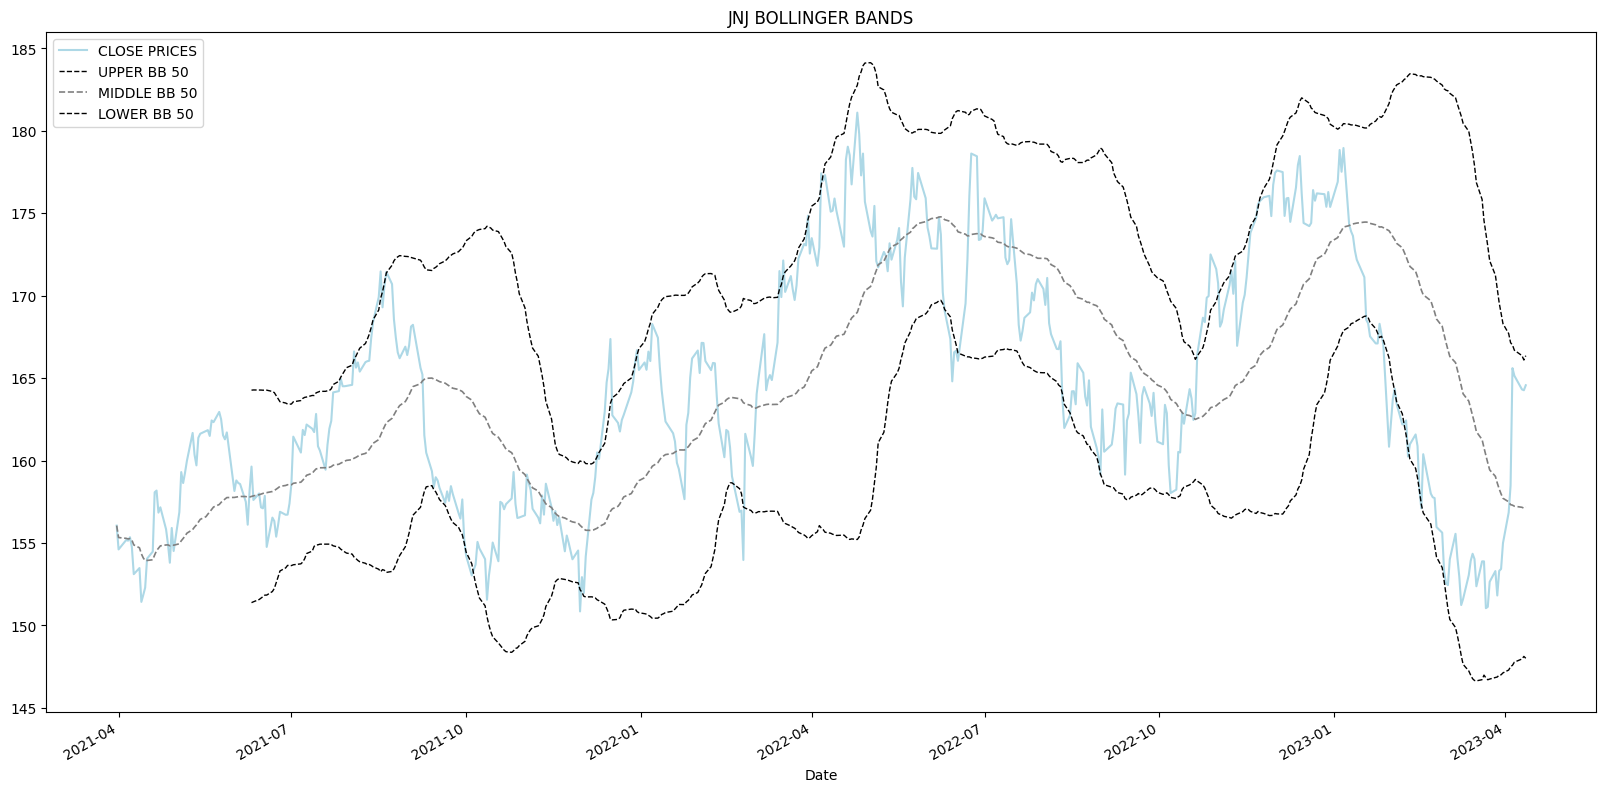

In [ ]:
plt.figure(figsize = (20,10))
df['Adj Close'].plot(label = 'CLOSE PRICES', color = 'lightblue')
df['upper_bb'].plot(label = 'UPPER BB 50', linestyle = '--', linewidth = 1, color = 'black')
df['SMA50'].plot(label = 'MIDDLE BB 50', linestyle = '--', linewidth = 1.2, color = 'grey')
df['lower_bb'].plot(label = 'LOWER BB 50', linestyle = '--', linewidth = 1, color = 'black')
plt.legend(loc = 'upper left')
plt.title('JNJ BOLLINGER BANDS')
plt.show()

In [ ]:
def implement_bb_strategy(data, lower_bb, upper_bb):
    buy_price = []
    sell_price = []
    bb_signal = []
    signal = 0
    
    for i in range(len(data)):
        if data[i-1] > lower_bb[i-1] and data[i] < lower_bb[i]:
            if signal != 1:
                buy_price.append(data[i])
                sell_price.append(np.nan)
                signal = 1
                bb_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
        elif data[i-1] < upper_bb[i-1] and data[i] > upper_bb[i]:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(data[i])
                signal = -1
                bb_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            bb_signal.append(0)
            
    return buy_price, sell_price, bb_signal

buy_price, sell_price, bb_signal = implement_bb_strategy(df['Adj Close'], df['lower_bb'], df['upper_bb'])

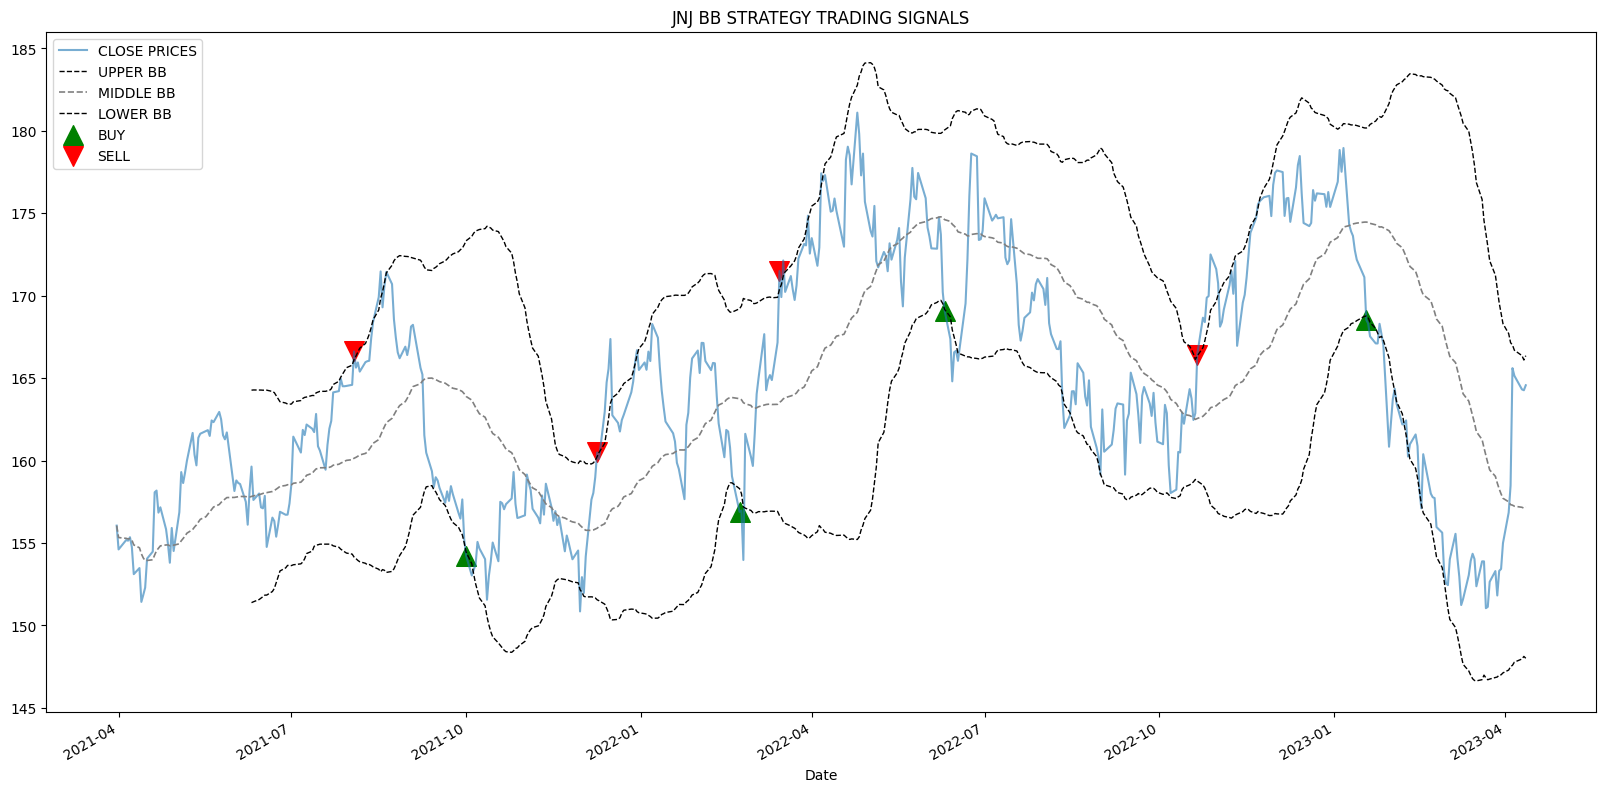

In [ ]:
plt.figure(figsize = (20,10))
df['Adj Close'].plot(label = 'CLOSE PRICES', alpha = 0.6)
df['upper_bb'].plot(label = 'UPPER BB', linestyle = '--', linewidth = 1, color = 'black')
df['SMA50'].plot(label = 'MIDDLE BB', linestyle = '--', linewidth = 1.2, color = 'grey')
df['lower_bb'].plot(label = 'LOWER BB', linestyle = '--', linewidth = 1, color = 'black')
plt.scatter(df.index, buy_price, marker = '^', color = 'green', label = 'BUY', s = 200)
plt.scatter(df.index, sell_price, marker = 'v', color = 'red', label = 'SELL', s = 200)
plt.title('JNJ BB STRATEGY TRADING SIGNALS')
plt.legend(loc = 'upper left')
plt.show()

# **Comparison Between Monti Carlo Simulation and EMA(Exponential  Moving Average)**

In [ ]:
df['EMA15'] = df['Adj Close'].ewm(span=15, adjust=False).mean()

# Select columns for data
data = df[["Adj Close", "EMA15"]]
data

,Adj Close,EMA15
Date,,
2021-03-31,156.057465,156.057465
2021-04-01,154.614136,155.877048
2021-04-05,155.183853,155.790399
2021-04-06,155.145889,155.709835
2021-04-07,155.354782,155.665454
...,...,...
2023-04-05,165.610001,155.823076
2023-04-06,165.149994,156.988941
2023-04-10,164.320007,157.905324


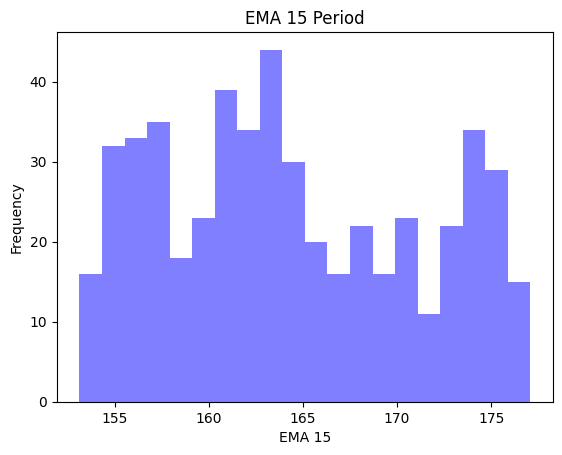

In [ ]:
# Create histogram of SMA 15
plt.hist(df['EMA15'], bins=20, color='blue', alpha=0.5)

# Add title and labels
plt.title('EMA 15 Period')
plt.xlabel('EMA 15')
plt.ylabel('Frequency')

# Show plot
plt.show()

<Axes: title={'center': 'Error between Close and EMA15'}, xlabel='Date'>

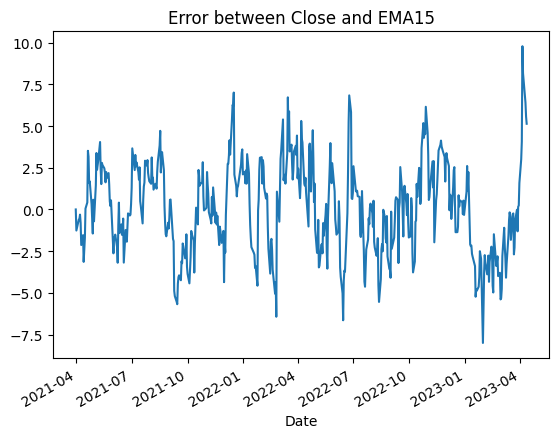

In [ ]:

# Calculate error
error = data["Adj Close"] - data["EMA15"]

# Plot error
error.plot(title="Error between Close and EMA15")

Based on the analysis provided, it seems that the Monte Carlo simulation gives a more accurate measure of the stock price range compared to the EMA forecasting. This may be because the Monte Carlo simulation takes into account a wider range of possible outcomes and can generate a more realistic range of prices.Upon comapring the prices between Monti-Carlo Simulation and EMA the results were fairly similar the estimated prices range between 155 to 180.

Regarding the error distribution, the fact that the majority of the errors are positive and that the EMA is overestimating the price of shares suggests that the EMA may not be the most suitable forecasting technique for this particular stock. It may be worth exploring other forecasting techniques, such as the Simple Moving Average or the Weighted Moving Average, to see if they produce more accurate results.

Additionally, it is important to note that stock price forecasting is a complex and challenging task, and no single technique can guarantee accurate results. It is important to regularly review and adjust the forecasting techniques based on the changing market conditions and other factors that may impact the stock price.